Create an interactive map displaying countries and average temperature in time.

Data: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

See https://www.kaggle.com/ash316/is-the-mercury-rising

In [68]:
import pandas as pd
import numpy as np


In [1]:

global1=pd.read_csv('../datasets/global_temp/GlobalTemperatures.csv')
global1=global1[['dt','LandAverageTemperature']]
global1.dropna(inplace=True)
# better to use resample?
global1['dt']=pd.to_datetime(global1.dt).dt.strftime('%d/%m/%Y')
global1['dt']=global1['dt'].apply(lambda x:x[6:])
global1=global1.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

global1

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


<AxesSubplot:>

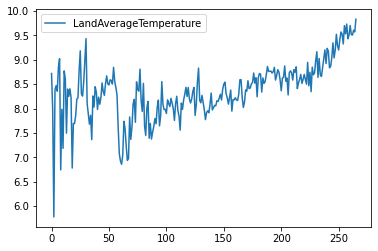

In [2]:
global1.plot()

Temperature is going up.  How to convert to a date time so axis is right?

In [1]:
!pip install geopandas

     |████████████████████████████████| 994 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 20.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 19.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 19.8 MB/s eta 0:00:01


In [3]:
import geopandas



In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [5]:
world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

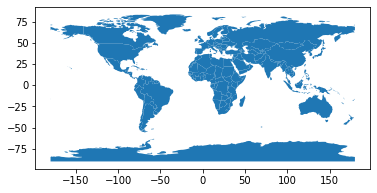

In [6]:
world.plot()

Attempt to reproduce this with country name map, etc.. but for global temp.
Create an interactive map with a slider [ipywidgets](https://colab.research.google.com/github/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb#scrollTo=Nwm1m14xB5fD)

Refs:

https://in.springboard.com/blog/time-series-analysis-interactive-time-series-maps-for-covid-19-spread/

https://stackoverflow.com/questions/16253060/how-to-convert-country-names-to-iso-3166-1-alpha-2-values-using-python


In [65]:
global1=pd.read_csv('../datasets/global_temp/GlobalLandTemperaturesByCountry.csv')

In [66]:
global1

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [51]:
#global1.dropna(inplace=True)
global1.dt = pd.to_datetime(global1.dt)
global1 = global1.set_index('dt')
global1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  545550 non-null  float64
 2   Country                        577462 non-null  object 
dtypes: float64(2), object(1)
memory usage: 17.6+ MB


In [53]:
# see what the country names are that are used.
global1.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [69]:
#check against world map data.  They are different.  We need a way to convert themn
np.sort(world.name.unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 

In [52]:
global1.groupby(['dt','Country']).mean()

AverageTemperature  AverageTemperatureUncertainty
dt         Country                                                          
1743-11-01 Albania                      8.620                          2.268
           Andorra                      7.556                          2.188
           Austria                      2.482                          2.116
           Belarus                      0.767                          2.465
           Belgium                      7.106                          1.855
...                                       ...                            ...
2013-09-01 Western Sahara                 NaN                            NaN
           Yemen                          NaN                            NaN
           Zambia                         NaN                            NaN
           Zimbabwe                       NaN                            NaN
           Åland                          NaN                            NaN

[577462 rows x 2 columns]

In [50]:
merged = world.merge(global1, left_on='name', right_on='Country')
merged

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 368246 entries, 0 to 368245
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   pop_est                        368246 non-null  int64   
 1   continent                      368246 non-null  object  
 2   name                           368246 non-null  object  
 3   iso_a3                         368246 non-null  object  
 4   gdp_md_est                     368246 non-null  float64 
 5   geometry                       368246 non-null  geometry
 6   dt                             368246 non-null  object  
 7   AverageTemperature             350422 non-null  float64 
 8   AverageTemperatureUncertainty  351161 non-null  float64 
 9   Country                        368246 non-null  object  
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 30.9+ MB


In [57]:
merged



,pop_est,continent,name,iso_a3,gdp_md_est,geometry,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1867-01-01,26.341,0.910,Fiji
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1867-02-01,26.333,1.017,Fiji
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1867-03-01,26.153,0.959,Fiji
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1867-04-01,25.775,1.069,Fiji
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1867-05-01,25.111,1.034,Fiji
...,...,...,...,...,...,...,...,...,...,...
368241,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2013-05-01,16.611,0.514,Montenegro
368242,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2013-06-01,19.402,0.362,Montenegro
368243,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2013-07-01,21.988,0.424,Montenegro
368244,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",2013-08-01,23.035,0.881,Montenegro


<AxesSubplot:>

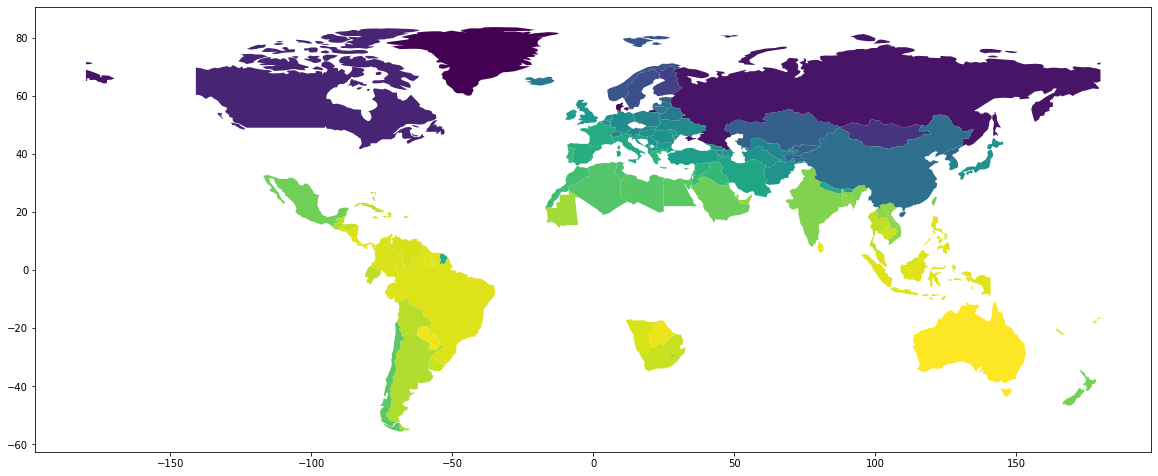

In [61]:
merged[merged.dt == pd.Timestamp(1867,1,1)].plot(column="AverageTemperature", figsize=(20,20))